In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
df = pd.read_csv('aidata.log',header=None)

In [4]:
data = df.values[:,:-1]
data = data.astype(np.float64)
data = (data-np.mean(data))/np.var(data)
print(data.shape)
label = df.values[:,-1]
label = np.where(label==True,np.ones(label.shape),np.zeros(label.shape))
print(sum(label==1))
folds = []
skf = StratifiedKFold(n_splits=5)

(465, 65)
381


[0.77768298 0.09374853 0.03894302]
[6.84391555 2.37621409 1.53150406]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
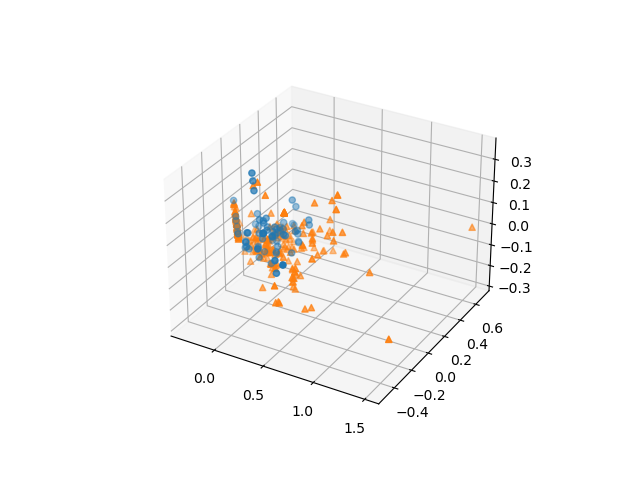

In [5]:
pca = PCA(n_components=3)
pca.fit(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
compressed_data = pca.transform(data)
# print(compressed_data[label==0])
# plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(compressed_data[label==0.0,0],compressed_data[label==0.0,1], compressed_data[label==0.0,2], marker='o', cmap='Greens')
ax.scatter3D(compressed_data[label==1.0,0],compressed_data[label==1.0,1], compressed_data[label==1.0,2], marker='^', cmap='Reds')
plt.show()

In [9]:
skf_val = StratifiedKFold(n_splits=4)
data = compressed_data
for train_index, _ in skf.split(data, label):
    ros = RandomOverSampler(random_state=0)
    train_data = data[train_index]
    train_label = label[train_index]
    for vtrain_index, val_index in skf_val.split(train_data, train_label):
        vtrain_data = train_data[vtrain_index]
        vtrain_label = train_label[vtrain_index]
        val_data = train_data[val_index]
        val_label = train_label[val_index]
        X, y = ros.fit_resample(train_data, train_label)
        clf = RandomForestClassifier(max_depth=4,random_state=0)
        clf.fit(X,y)
        print(sum(train_label==0))
        print(clf.score(val_data[val_label==0], val_label[val_label==0]))
    

68
0.9411764705882353
68
1.0
68
1.0
68
0.9411764705882353
67
0.6875
67
1.0
67
1.0
67
0.9411764705882353
67
0.6875
67
0.9411764705882353
67
1.0
67
1.0
67
0.6875
67
0.9411764705882353
67
1.0
67
1.0
67
0.6875
67
0.9411764705882353
67
1.0
67
1.0
